
<font size=6><b>Критерии Стьюдента</b></font>

## Задание 4

Уровень кальция в крови здоровых молодых женщин равен в среднем 9.5 милиграммам на децилитр и имеет характерное стандартное отклонение 0.4 мг/дл. В сельской больнице Гватемалы для 160 здоровых беременных женщин при первом обращении для ведения беременности был измерен уровень кальция; среднее значение составило 9.57 мг/дл. Можно ли утверждать, что средний уровень кальция в этой популяции отличается от 9.5?

Посчитайте достигаемый уровень значимости. Поскольку известны только среднее и дисперсия, а не сама выборка, нельзя использовать стандартные функции критериев — нужно реализовать формулу достигаемого уровня значимости самостоятельно.

Округлите ответ до четырёх знаков после десятичной точки.


**Достигаемый (или достигнутый) уровень значимости** – это вероятность получить значение статистики такое, как получилось в эксперименте, или ещё более экстремальное (чаще всего более высокое) при справедливости нулевой гипотезы.

Чем ниже p, тем больше сильнее данные свидетельствуют против нулевой гипотезы в пользу альтернативы.



Проверьте, что вы:
- взяли верную альтернативу
- сделали правильный выбор между t- и z-критериями
- не ошиблись в формуле статистики и достигаемого уровня значимости (лекция "Одновыборочные критерии Стьюдента")

In [12]:
 from scipy.stats import norm

    Parameters
    ----------
    x : array_like
        quantiles
    arg1, arg2, arg3,... : array_like
        The shape parameter(s) for the distribution (see docstring of the
        instance object for more information)
    loc : array_like, optional
        location parameter (default=0)
    scale : array_like, optional
        scale parameter (default=1)

    Returns
    -------
    cdf : ndarray
        Cumulative distribution function evaluated at `x`

In [10]:
population_mean = 9.5
sample_mean = 9.57
sample_size = 160
sd_population = 0.4
z = (sample_mean - population_mean)/(sd_population/sample_size**0.5)
z

2.213594362117875

In [15]:
p = 2*(1-norm.cdf(abs(z)))
round(p, 4)

0.0269

## Задание 7
Имеются данные о стоимости и размерах 53940 бриллиантов.

Отделите 25% случайных наблюдений в тестовую выборку с помощью функции sklearn.cross_validation.train_test_split (зафиксируйте random state = 1). На обучающей выборке настройте две регрессионные модели:

линейную регрессию с помощью LinearRegression без параметров

случайный лес из 10 деревьев с помощью RandomForestRegressor с random_state=1.

Какая из моделей лучше предсказывает цену бриллиантов? Сделайте предсказания на тестовой выборке, посчитайте модули отклонений предсказаний от истинных цен. Проверьте гипотезу об одинаковом среднем качестве предсказаний, вычислите достигаемый уровень значимости. Отвергается ли гипотеза об одинаковом качестве моделей против двусторонней альтернативы на уровне значимости α=0.05?

In [1]:
import pandas as pd

In [6]:
path = 'diamonds.txt'
diamonds = pd.read_csv(path, sep='\t')

In [7]:
diamonds

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74


`abs(y_test - rf.predict(X_test)))`

In [8]:
diamonds.columns

Index(['carat', 'depth', 'table', 'price', 'x', 'y', 'z'], dtype='object')

In [10]:
diamonds_X = diamonds[['carat', 'depth', 'table', 'x', 'y', 'z']]

In [11]:
diamonds_y = diamonds['price']

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from scipy.stats import ttest_rel

In [23]:
X_train, X_test, y_train, y_test = train_test_split(diamonds_X, diamonds_y, test_size=0.25, random_state=1)

# Проверка. Доля тестовой выборки
len(X_test)/len(diamonds_X)

0.25

In [28]:
lr = LinearRegression()
rf = RandomForestRegressor(n_estimators=10, random_state=1)

lr.fit(X_train, y_train)
rf.fit(X_train, y_train)

y_pred_lr=lr.predict(X_test)
y_pred_rf=rf.predict(X_test)

In [29]:
print('R2 для линейной регрессии: ', r2_score(y_true=y_test, y_pred=y_pred_lr))
print('R2 для случайного леса: ', r2_score(y_true=y_test, y_pred=y_pred_rf))

R2 для линейной регрессии:  0.8615514393114848
R2 для случайного леса:  0.872272716766677


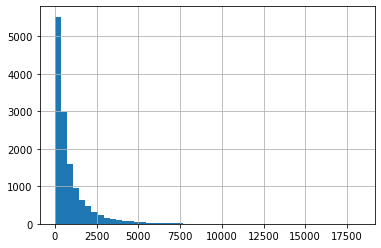

In [36]:
lr_residuals = abs(y_test - y_pred_lr)
lr_residuals.hist(bins=50)

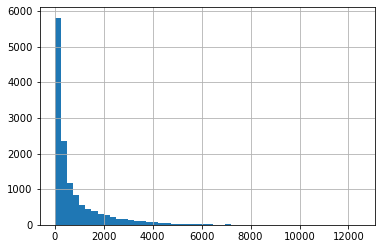

In [37]:
rf_residuals = abs(y_test - y_pred_rf)
rf_residuals.hist(bins=50)

In [40]:
ttest_rel(lr_residuals, rf_residuals)

Ttest_relResult(statistic=13.01772978387856, pvalue=1.6551745751413995e-38)

Посчитайте 95% доверительный интервал для разности средних абсолютных ошибок предсказаний регрессии и случайного леса. Чему равна его ближайшая к нулю граница? Округлите до десятков (поскольку случайный лес может давать немного разные предсказания в зависимости от версий библиотек, мы просим вас так сильно округлить, чтобы полученное значение наверняка совпало с нашим).

In [47]:
from statsmodels.stats.weightstats import CompareMeans
from statsmodels.stats.weightstats import DescrStatsW

In [48]:
CompareMeans(DescrStatsW(lr_residuals), DescrStatsW(rf_residuals)).tconfint_diff()

(59.83194833382869, 115.079817978469)